In [23]:
# 7/22/21: https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

# end cite


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import json
import os
from os.path import join, exists

import pandas as pd
import matplotlib.pyplot as plt

In [26]:
from utils import load_models, transformers_bert_completions, split_gen
import config

In [22]:
import importlib
importlib.reload(load_models)

<module 'utils.load_models' from '/home/nwong/chompsky/childes/child_listening_continuation/child-directed-listening/utils/load_models.py'>

## Load "classification" data

In [104]:
split = 'all'; dataset = 'all';

this_split_loc = split_gen.get_split_folder(split, dataset, config.model_analyses_dir)
results_path = join(this_split_loc, 'completions_classification.csv')
this_df = pd.read_csv(results_path).reset_index()

this_df['index'] = list(range(this_df.shape[0]))
this_df.set_index('index')

has_chi = lambda s : '[CHI]' in s

this_df['pred_chi'] = (this_df['cgv_prob'] < this_df['chi_prob'])
this_df['has_chi'] = list(map(has_chi, this_df['sentence']))


## True vs predicted CHI CGV

## Tokens with for lowest CHI CGV probabilities

In [111]:
def find_lowest_probs(is_chi, df, sel_num = 20):

    key = 'chi_prob' if is_chi else 'cgv_prob'
    lowest_idxs = np.argsort(df[key])[:sel_num]

    lowest_df = df[df.index.isin(lowest_idxs)]
    
    assert sorted(this_df[key])[:20] == sorted(lowest_df[key])
    
    return lowest_df
    
print('For lowest chi probs')
find_lowest_probs(True, this_df)

For lowest chi probs


,index,Unnamed: 0,cgv_prob,chi_prob,sentence,pred_chi,has_chi
25,25,25,0.002576,0.001355,[CGV] baby baby bunting.\n,False,False
29,29,29,0.034245,0.003258,[CGV] but she's just a little bit frightened s...,False,False
97,97,97,0.005801,0.000815,[CGV] is he?\n,False,False
109,109,109,0.014832,0.002243,[CGV] kinda big isn't it?\n,False,False
110,110,110,0.002429,0.001963,[CGV] knock knock.\n,False,False
179,179,179,0.336306,0.005173,[CGV] shall we go and put some socks and your ...,False,False
198,198,198,0.089450,0.003867,[CGV] that's the best way isn't it?\n,False,False
204,204,204,0.005158,0.001540,[CGV] then grover put his pajamas under his pi...,False,False
208,208,208,0.045346,0.001102,[CGV] they finish eating?\n,False,False
216,216,216,0.006541,0.003221,[CGV] tyres are made of...\n,False,False


In [112]:

print('For lowest cgv probs')
find_lowest_probs(False, this_df)

For lowest cgv probs


,index,Unnamed: 0,cgv_prob,chi_prob,sentence,pred_chi,has_chi
25,25,25,0.002576,0.001355,[CGV] baby baby bunting.\n,False,False
29,29,29,0.034245,0.003258,[CGV] but she's just a little bit frightened s...,False,False
97,97,97,0.005801,0.000815,[CGV] is he?\n,False,False
104,104,104,0.008150,0.005261,[CGV] it this hair or what?\n,False,False
109,109,109,0.014832,0.002243,[CGV] kinda big isn't it?\n,False,False
110,110,110,0.002429,0.001963,[CGV] knock knock.\n,False,False
122,122,122,0.021163,0.006330,[CGV] many of those fairy tales ones some of t...,False,False
175,175,175,0.025346,0.021529,[CGV] round and around and around round round.\n,False,False
204,204,204,0.005158,0.001540,[CGV] then grover put his pajamas under his pi...,False,False
206,206,206,0.024110,0.011119,[CGV] there was a a german friend home of of m...,False,False


## Check training set distribution

In [85]:
has_chi = lambda s : '[CHI]' in s

val_file_all_all = split_gen.get_split_folder('all', 'all', config.finetune_dir)

with open(join(val_file_all_all, 'val.txt'), 'r') as f:
    all_lines = f.readlines()
    
chi_lines = list(filter(has_chi, all_lines))
num_chi = len(chi_lines)
num_cgv = len(all_lines) - num_chi

print(f'Number of child in all/all split: {num_chi}')
print(f'Number of cgv in all/all split: {num_cgv}')

Number of child in all/all split: 317022
Number of cgv in all/all split: 461349


## Classification analysis code

In [46]:
# Dev mode
    
pred_chi = np.array(list(this_df['chi_prob'] > this_df['cgv_prob'])).astype('int')

accuracy = np.mean(pred_chi)

has_chi = lambda s : '[CHI]' in s
num_chi = len(list(filter(has_chi, this_df['sentence'])))

print('Accuracy at predicting labels', accuracy)
print()
print('Number of times that CHI is predicted', np.sum(pred_chi))
print(f'\tNumber of CHI tokens: {num_chi}')
print('Number of times that CGV is predicted', pred_chi.shape[0] - np.sum(pred_chi))
print(f'\tNumber of CGV tokens: {pred_chi.shape[0] - num_chi}')


Accuracy at predicting labels 0.204

Number of times that CHI is predicted 102
	Number of CHI tokens: 200
Number of times that CGV is predicted 398
	Number of CGV tokens: 300


In [86]:
398 / 500

0.796

In [52]:
# 2 Joint distributions
# 1) Joint distribution: 
# density plot -> x axis probability CGV, y axis probability CHI
# facet two panels -> one is true label cgv -> one is true label is cgv


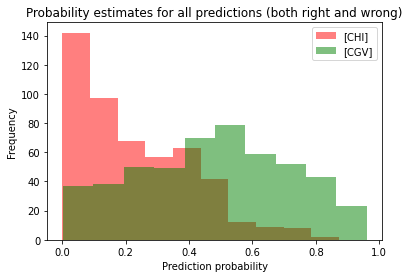

In [51]:

plt.title('Probability estimates for all predictions (both right and wrong)')

plt.xlabel('Prediction probability'); plt.ylabel('Frequency')
plt.hist(this_df['chi_prob'], color = 'r', alpha = 0.5, label = '[CHI]')
plt.hist(this_df['cgv_prob'], color = 'g', alpha = 0.5, label = '[CGV]')

plt.legend()

plt.show()

## Training process

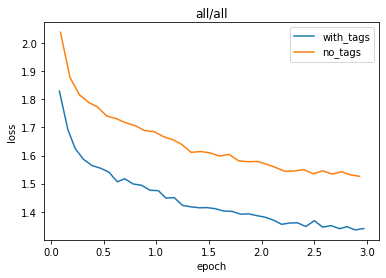

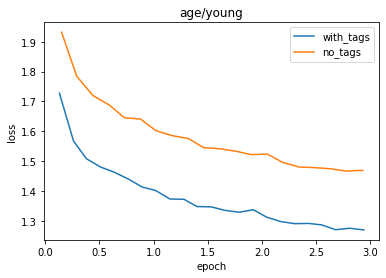

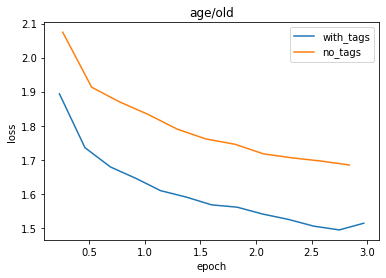

In [5]:
# Can read the results of models via trainer_state.json! 

# Intent is to figure out what is wrong with the tags fitting
# and why tags is worse -- is it overfitting?

# Also,
# Is model improving? What if we ran it for longer?
# What is happening to the loss

# Look at tags first

for arg_set in config.childes_model_args: # add children later
    
    for tags in [True, False]:
        model_path = load_models.get_model_path(arg_set[0], arg_set[1], tags)
        with open(join(model_path, 'trainer_state.json'), 'r') as f:
            this_history = json.load(f)['log_history']
            
            epochs = []; losses = []
            
            for step_dict in this_history[:-1]: # Omit summary stats
                epochs.append(step_dict['epoch'])
                losses.append(step_dict['loss'])
            
            tag_str =  "with_tags" if tags else "no_tags"
            dataset_name = '/'.join(arg_set)
            
            plt.title(f'{dataset_name}')
            plt.xlabel('epoch'); plt.ylabel('loss')
            plt.plot(epochs, losses, label = tag_str)
            
    plt.legend(); plt.show()

## Tag completions

In [13]:
## Building code in advance

def analyze_completions(sentences, model, tokenizer, softmax_mask):
    
    sentence_results = {}
    
    for sentence_type, sentence in sentences.items():
        _, completions = transformers_bert_completions.bert_completions(sentence, model, tokenizer, softmax_mask)
        sentence_results[sentence_type] = completions
        
    return sentence_results
    
chi_sentence = "[CHI] I want to [MASK]."
cgv_sentence = "[CGV] I want to [MASK]."

pred_chi = "[MASK] I want to go to the zoo."
pred_cgv = "[MASK] I want to go to the store."

sentences = {
    'chi_complete' : chi_sentence,
    'cgv_complete' : cgv_sentence,
    'pred_chi' : pred_chi,
    'pred_cgv' : pred_cgv,
}


In [55]:
initial_vocab_mask

array([ 1037,  1038,  1039, ..., 29588, 29593, 29594])

In [22]:
tag_model.keys()

dict_keys(['title', 'kwargs', 'type'])

In [59]:
print(initial_tokenizer.convert_tokens_to_ids(['[chi]']))
print(initial_tokenizer.convert_tokens_to_ids(['[cgv]']))

[30522]
[30523]


In [14]:

import numpy as np

# For future use
split = 'age'; dataset = 'old'
tag_model = load_models.get_finetune_dict(split, dataset, True, 20)['kwargs']['modelLM']


initial_tokenizer = load_models.get_primary_tokenizer()

cmu_2syl_inchildes = load_models.get_cmu_dict_info()
    
initial_vocab_mask, _ = transformers_bert_completions.get_softmax_mask(initial_tokenizer,
    cmu_2syl_inchildes.word)


analysis_args = {
    'model' : tag_model,
    'tokenizer' : initial_tokenizer,
    'softmax_mask' : np.concatenate([initial_vocab_mask, np.array([30522, 30523])]),
}

In [41]:
from pprint import pprint

pprint(sentences)

{'cgv_complete': '[CGV] I want to [MASK].',
 'chi_complete': '[CHI] I want to [MASK].',
 'pred_cgv': '[MASK] I want to go to the store.',
 'pred_chi': '[MASK] I want to go to the zoo.'}


In [15]:
results = analyze_completions(sentences = sentences, **analysis_args)

# Index out of range of self? Why?
# Because the adult model is not adjusted to the ? What tokenizer is typically used?
# It's because of the UNKs probably it (xxx, yyy) should be converted to UNK. 
# Is this expected behavior?

# How is this typically handled -- Adult BERT never receives tags so this is expected.



In [16]:
which_pred = 'pred_chi'

which_df = results[which_pred]
sel_df = which_df[which_df['word'] == '[chi]']

print(which_df[which_df['word'] == '[chi]'])
print(which_df[which_df['word'] == '[cgv]'])


          prob   word  rank
7904  0.599197  [chi]     0
          prob   word  rank
7905  0.111233  [cgv]     1


In [18]:
which_df[which_df['word'] == '[chi]']['prob']

0.5991969704627991

In [67]:
which_pred = 'pred_cgv'

which_df = results[which_pred]

print(which_df.head(5))

sel_df = which_df[which_df['word'] == '[cgv]']

print(sel_df)



          prob   word  rank
7904  0.461573  [chi]     0
7905  0.126699  [cgv]     1
8     0.075225      i     2
80    0.044257     no     3
630   0.030567     oh     4
          prob   word  rank
7905  0.126699  [cgv]     1


In [46]:
sentence = "[CHI] [MASK] want to go to the zoo."

_, completions = transformers_bert_completions.bert_completions(sentence, tag_model, initial_tokenizer, initial_vocab_mask)
completions.head(10)
        
    

,prob,word,rank
8,0.932832,i,0
45,0.018377,you,1
84,0.005512,we,2
6651,0.004383,mommy,3
55,0.003034,they,4
31,0.002964,he,5
61,0.002316,me,6
44,0.002181,she,7
3504,0.001653,daddy,8
3475,0.001067,um,9


In [47]:
sentence = "[CGV] [MASK] want to go to the zoo."

_, completions = transformers_bert_completions.bert_completions(sentence, tag_model, initial_tokenizer, initial_vocab_mask)
completions.head(10)
        
    

,prob,word,rank
45,0.483504,you,0
8,0.419221,i,1
55,0.039663,they,2
84,0.018343,we,3
31,0.004134,he,4
128,0.002974,people,5
102,0.002243,do,6
44,0.001907,she,7
53,0.001725,not,8
63,0.001631,all,9


In [72]:
from utils import load_splits

all_tokens = load_splits.load_phono()

In [96]:
all_tokens[all_tokens.partition == 'success'].iloc[10000:100020]

,token,utterance_id,gloss,transcript_id,utterance_order,target_child_name,speaker_code,type,punct,speaker_code_simple,...,cv_collapsed,num_vowels,in_vocab,success_token,yyy_token,partition,phase_sample,year,phase_child_sample,phase_child_finetune
226652,no,16802424,no,42221,713,Alex,CHI,declarative,.,[CHI],...,cv,1.0,True,True,False,success,eval,2.0,val,val
226660,the,16802426,the fruit,42238,1280,Alex,CHI,declarative,.,[CHI],...,cv,1.0,True,True,False,success,eval,2.5,val,val
226661,fruit,16802426,the fruit,42238,1280,Alex,CHI,declarative,.,[CHI],...,cv,1.0,True,True,False,success,eval,2.5,val,val
226684,that,16802432,what's that,42229,65,Alex,CHI,question,?,[CHI],...,cv,1.0,True,True,False,success,train,2.0,eval,NaN
226707,the,16802437,the bag,42241,180,Alex,CHI,declarative,.,[CHI],...,cv,1.0,True,True,False,success,eval,2.5,train,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760827,belong,17036478,where do they belong,42410,484,Naima,CHI,question,?,[CHI],...,cvcvc,2.0,True,True,False,success,eval,1.5,val,val
1760830,eat,17036479,eat some sesame,42412,1072,Naima,CHI,declarative,.,[CHI],...,vc,1.0,True,True,False,success,eval,1.5,train,train
1760831,some,17036479,eat some sesame,42412,1072,Naima,CHI,declarative,.,[CHI],...,cvc,1.0,True,True,False,success,eval,1.5,train,train
1760879,might,17036484,might be a she,42405,1114,Naima,CHI,declarative,.,[CHI],...,cv,1.0,True,True,False,success,eval,1.5,train,train


In [ ]:

this_id = 17036479
results_with_tags = transformers_bert_completions.get_stats_for_success(
    all_tokens, this_id, tag_model, initial_tokenizer, analysis_args['softmax_mask'], context_width_in_utts=3, use_speaker_labels=True
)

results_without_tags = transformers_bert_completions.get_stats_for_success(
    all_tokens, this_id, tag_model, initial_tokenizer, analysis_args['softmax_mask'], context_width_in_utts=20, use_speaker_labels=False
)

print('without')
print([df.head(10) for df in results_without_tags[1]][-1])

print(); print('with')
print([df.head(10) for df in results_with_tags[1]][-1])

In [ ]:
get_stats_for_success(all_tokens, selected_utt_id)